In [1]:

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import base64
from urllib import parse

In [2]:
# # # Data Load
# df_normal = pd.read_csv('Dataset/Benign_list_big_final.csv')
# df_deface = pd.read_csv('Dataset/DefacementSitesURLFiltered.csv',encoding='latin-1')
# df_malware = pd.read_csv('Dataset/Malware_dataset.csv')
# df_phishing = pd.read_csv('Dataset/phishing_dataset.csv')
# df_spam = pd.read_csv('Dataset/spam_dataset.csv')

In [3]:
# df_normal.rename(columns={'Begin URL':'URL'},inplace=True)
# df_deface.rename(columns={'Defacement URL':'URL'},inplace=True)
# df_malware.rename(columns={'Malware URL':'URL'},inplace=True)
# df_phishing.rename(columns={'Phishing URL':'URL'},inplace=True)
# df_spam.rename(columns={'Spam URL':'URL'},inplace=True)


# Normal, Attack(Malware/Phishing/Spam/Defacement) Labeling

In [4]:
# # Data Label List 
# normal_label_list = []
# malware_label_list = []
# deface_label_list = []
# spam_label_list = []
# phishing_label_list = []
# for i in range(len(df_normal)):
#     normal_label_list.append('Normal')
# for j in range(len(df_malware)):
#     malware_label_list.append('Malware')
# for n in range(len(df_deface)):
#     deface_label_list.append('Defacement')
# for m in range(len(df_phishing)):
#     phishing_label_list.append('Phishing')
# for k in range(len(df_spam)):
#     spam_label_list.append('Spam')
 

In [5]:
# # Labeling
# df_normal['Label'] = normal_label_list
# df_deface['Label'] = deface_label_list
# df_malware['Label'] = malware_label_list
# df_spam['Label'] = spam_label_list
# df_phishing['Label'] = phishing_label_list

In [6]:
# # 5개 data concat
# df_total = pd.concat([df_normal, df_deface, df_malware, df_phishing, df_spam],axis=0)
# df_total

In [7]:
# df_total.to_csv('total_dataset.csv', index=None)

In [47]:
import pandas as pd

df_total = pd.read_csv('total_dataset.csv')

In [45]:
y = df_total.iloc[:,-1]
X = df_total.drop(columns='Label')

In [46]:
X

,URL
0,http://1337x.to/torrent/1048648/American-Snipe...
1,http://1337x.to/torrent/1110018/Blackhat-2015-...
2,http://1337x.to/torrent/1122940/Blackhat-2015-...
3,http://1337x.to/torrent/1124395/Fast-and-Furio...
4,http://1337x.to/torrent/1145504/Avengers-Age-o...
...,...
165359,http://archive.salisburyjournal.co.uk/2001/3/7/
165360,http://astore.amazon.co.uk/allezvinsfrenchr/de...
165361,http://archive.thisischeshire.co.uk/2000/1/14/...
165362,http://applerugs.co.uk/rugs/product_info.php?p...


# URL Lexical Featuring

In [48]:
from network_feature import http_url

instance = []
for url in df_total['URL']:
    # print(url)
    instance.append(http_url(url))

In [49]:
col = ['len_url', 'num_dot', 'num_slash', 'num_ampersand', 'num_dash', 'num_space', 'num_doubleslash', 'num_token', 'len_repeat_str_url', 'Entropy_url', 'distribution_of_url_num', 'distribution_of_url_alpha', 'distribution_of_url_special', 'len_host', 'IF_ip_exist_in_host', 'IF_ip_exist_in_host', 'IF_port_in_host', 'len_repeat_str_host', 'num_subdomain', 'len_tld', 'distribution_of_host_num', 'distribution_of_host_alpha', 'distribution_of_host_special', 'len_path', 'maxstr_subdir', 'len_filename', 'num_dot_filename', 'len_query', 'maxstr_query_val', 'num_dot_query', 'distribution_of_query_num', 'distribution_of_query_alpha', 'distribution_of_query_special', 'avg_of_query_val']
 = pd.DataFrame(inzstance, columns=col)

In [50]:
featured_df.to_csv('featured_data.csv', index=None)

# Min-Max Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
scaler = Pipeline([('scaler', StandardScaler())])
scaled_df = scaler.fit_transform(featured_df)

# Train/ Test Split

In [52]:
df_total['Label'] = df_total['Label'].replace({'Normal':0, 'Defacement':1,'Phishing':2,'Malware':3,'Spam':4})
target = df_total['Label'].tolist()

In [53]:
df_total['Label'].value_counts()

1    96455
0    35378
4    12000
3    11566
2     9965
Name: Label, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,target, test_size=0.3, stratify=target, random_state=21)

In [55]:
X_train_df = pd.DataFrame(X_train, columns=col)
X_test_df = pd.DataFrame(X_test, columns=col)

In [56]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train_df, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = featured_df.columns
feature_rank = mutual_info.sort_values(ascending=False)
feature_ig = feature_rank.head(10).values.tolist()
select_feature_li = feature_rank.head(10).index.tolist()

TypeError: mutual_info_classif() missing 1 required positional argument: 'y'

In [39]:
feature_ig

[0.4086801666157014,
 0.3767914334422602,
 0.3761258386508455,
 0.37396464324598466,
 0.35254039327755815,
 0.34586398984447175,
 0.309822910302767,
 0.2969924057931437,
 0.2836874967447227,
 0.27189939790102935]

<BarContainer object of 10 artists>

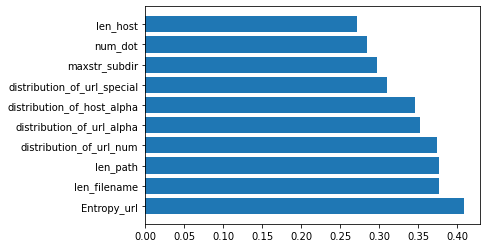

In [40]:
import matplotlib.pyplot as plt

plt.barh(select_feature_li, feature_ig)

In [17]:
X_train_df = X_train_df[select_feature_li]
X_test_df = X_test_df[select_feature_li]

In [18]:
# XGBoost Model
import xgboost as xgb
import pickle

model = xgb.XGBClassifier(
    booster='gbtree',
    max_depth=3,
    objective='multi:softmax',
    num_class=4, eval_metric='merror'
)
model.fit(X_train_df,y_train)

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=20,
              num_class=4, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [19]:
# AI Model Prediction
ypred_xgb=model.predict(X_test_df)

In [20]:
ypred_xgb

array([1, 1, 1, ..., 1, 3, 1])

In [21]:

# AI Model Accuracy
print(accuracy_score(y_test, ypred_xgb))

0.9639790364845797


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    F1 = f1_score(y_test, y_pred, average='macro')
    # AUC = roc_auc_score(y_test, y_pred, multi_class ='raise')
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    # print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, ypred_xgb)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=8)

dt_clf = dt_clf.fit(X_train_df, y_train)
dt_prediction = dt_clf.predict(X_test_df)

In [ ]:
from sklearn.tree import _tree
from sklearn import tree
import pydotplus
from IPython.display import Image

target_name = np.array(['Normal', 'Defacement', 'Phishing', 'Malware', 'Spam'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   max_depth=8,
                                  feature_names = select_feature_li,
                                  class_names = target_name,
                                  filled = True, rounded = True, leaves_parallel= False,
                                  special_characters = True, precision=5)


dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    root_value = tree_.value[0][0]
    # print(tree_.impurity)
    paths = []
    path = []
    total_cov = tree_.value[0][0][0]

    def recurse(node, path, paths):
        count = 0
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1.append([f"{name} <= {np.round(threshold, 4)}", np.argmax(tree_.value[tree_.children_left[node]]), np.round(tree_.value[tree_.children_left[node]].max()/tree_.n_node_samples[tree_.children_left[node]], 4), np.round(tree_.value[tree_.children_left[node]].sum()/root_value.sum(), 4)]) 
            recurse(tree_.children_left[node], p1, paths)
            p2.append([f"{name} > {np.round(threshold, 4)}", np.argmax(tree_.value[tree_.children_right[node]]), np.round(tree_.value[tree_.children_right[node]].max()/tree_.n_node_samples[tree_.children_right[node]], 4), np.round(tree_.value[tree_.children_right[node]].sum()/root_value.sum(), 4)]) 
            recurse(tree_.children_right[node], p2, paths)
        else:
            paths += [path]
            
    recurse(0, path, paths)
#     return paths

# pt = get_rules(dt_clf, select_feature_li, target_name)

    # sort by samples count
    samples_count = [p[-1][2] for p in paths]
    ii = list(np.argsort(samples_count))

    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    # rules_df = pd.DataFrame(columns=col)
    overlab_rules = []
    for path in paths:
        rule_len = 0
        for i in range(len(path)):
            stack_rule = []
            for a in range(i):
                stack_rule += [path[a][0]]
            stack_rule += [path[i][0]]
            rule_len = len(stack_rule)
            rule = ' and '.join(stack_rule)
            if rule not in overlab_rules:
                overlab_rules.append(rule)
                app_rule = [rule, path[i][1], path[i][2], path[i][3],rule_len]
                rules.append(app_rule)
        
    return rules

In [ ]:
col = ['Rule', 'Class', 'Acc', 'Cov', 'Rules Length']
count = 0
representative_rules = pd.DataFrame(columns=col)
dt = get_rules(dt_clf, select_feature_li, target_name)

rule_df = pd.DataFrame(dt, columns=col)

rule_df['Class'].replace({0:'Normal', 1:'Defacement', 2:'Phishing', 3:'Malware', 4:'Spam'}, inplace= True)

rule_df.to_csv('total_rule_set.csv', index=None)

In [ ]:
###사용자 조건에 의한 필터링###

Acc_condition = 0.8
Cov_condition = 0.05
Rule_Length = 9
# rule_condition_total = rule_df
rule_condition_total = rule_df[(rule_df['Acc'] > Acc_condition) & (rule_df['Cov'] > Cov_condition) & (rule_df['Rules Length'] < Rule_Length)]
rule_condition_total=rule_condition_total.sort_values(by=['Rules Length'], ascending= False, axis=0)

rule_condition_total.to_csv('condition_rule_set.csv', index=None)

In [ ]:
###하위 노드 삭제###

# rf = rule_condition_total
# for r in rf['Rule']:
    
#     for index, rr in rf.iterrows():
#         if (r in rr['Rule']) & (r!=rr['Rule']):
#             # print(r)
#             # print(rr['Rule'])
#             # print('r :', r)
#             # print('rr :',rr['Rule'])
#             rf.drop(index, inplace=True)

In [ ]:
# rf.to_csv('representative_rule_set.csv', index=None)